In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from scipy.signal import savgol_filter
from pathlib import Path

DATA_DIR = Path('../data')


## Load Data

In [5]:
# Really convoluted method of reading in data due to package clashes 

# Dataframe for lobedata
lobe_data_w_vinegar = pd.read_hdf(DATA_DIR / 'experiments_summary.h5')

# Numpy array for df_fs
file = h5py.File(DATA_DIR / 'experiments_summary.h5', 'r')
df_fs = file['df_fs'][:] # numpy ndarray

In [6]:
# Collect data into a preliminary df
lobe_activities = np.row_stack(df_fs)

lobe_activities.shape

(5910, 80)

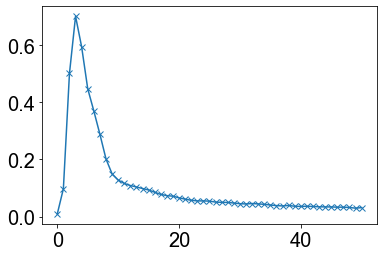

In [7]:
curve_shape = lobe_activities.mean(axis=0)
plt.plot(curve_shape[29:], '-x')

## Model Curve

This might be a bit too complex of a model.

In [8]:
def waveform(x, u, s): 
    return np.exp( -(np.log(x) - u)**2 / (2 * s**2) ) / (x * s * np.sqrt(2*np.pi))

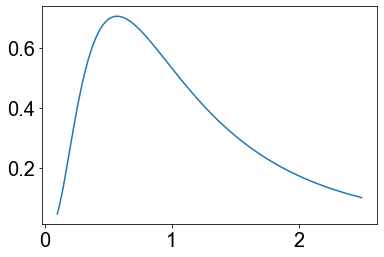

In [10]:
x = np.arange(0.1, 2.5, 0.01)
u = 0
s = 0.75

plt.plot(x, waveform(x, u, s))
plt.show()

In [11]:
from scipy import optimize

In [14]:
y_data = curve_shape[29:]
x_data = np.arange(1,52)
params, params_covariance = optimize.curve_fit(waveform, x_data, y_data,
                                               p0=[2, 2])
params

array([1.47102816, 0.23759337])

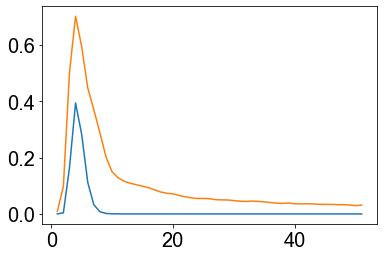

In [15]:
u = params[0]
s = params[1]

plt.plot(x_data, waveform(x_data, u, s))
plt.plot(x_data, y_data)